<a href="https://colab.research.google.com/github/mengwangk/dl-projects/blob/master/04_02_auto_ml_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automated ML

In [0]:
COLAB = True

In [2]:

if COLAB:
  # !sudo apt-get install git-lfs && git lfs install
  !rm -rf dl-projects
  !git clone https://github.com/mengwangk/dl-projects
  !cd dl-projects && ls

Cloning into 'dl-projects'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 702 (delta 42), reused 9 (delta 3), pack-reused 627
Receiving objects: 100% (702/702), 67.06 MiB | 21.29 MiB/s, done.
Resolving deltas: 100% (396/396), done.
01_01_tensor.ipynb	       04_10_basic_nn.ipynb   exp
01_02_correlation.ipynb        04_11_cnn.ipynb	      featurelib
01_03_preprocessing.ipynb      04_12_rnn.ipynb	      LICENSE
01_04_numpy.ipynb	       04_13_embedding.ipynb  lstm_s1.ipynb
01_05_parallelization.ipynb    05_calculus.ipynb      lstm_s2.ipynb
01_06_pandas..ipynb	       06_stats.ipynb	      lstm_s3.ipynb
01_07_python_0.ipynb	       07_algebra.ipynb       lstm_s4.ipynb
01_07_python_1.ipynb	       08_probability.ipynb   lstm_s5.ipynb
02_1_feature_engineer.ipynb    09_evaluation.ipynb    lstm_s6.ipynb
02_2_feature_generation.ipynb  50_RL.ipynb	      notebook2script.py
02_3_feature_generation.ipyn

In [0]:
if COLAB:
  !cp dl-projects/utils* .
  !cp dl-projects/preprocess* .

In [0]:
%reload_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
import math 
import matplotlib

from scipy import stats
from collections import Counter
from pathlib import Path

plt.style.use('fivethirtyeight')

sns.set(style="ticks")

# Automated feature engineering
import featuretools as ft

# Machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer, MinMaxScaler, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier

from IPython.display import display

from utils import *
from preprocess import *

# The Answer to the Ultimate Question of Life, the Universe, and Everything.
np.random.seed(42)

In [6]:
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



## Preparation

In [0]:
if COLAB:
  DATASET_PATH = Path("dl-projects/datasets")
else:
  DATASET_PATH = Path("datasets")

DATASET = DATASET_PATH/"4D.zip"

In [0]:
data = format_tabular(DATASET)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106398 entries, 0 to 106397
Data columns (total 4 columns):
DrawNo       106398 non-null int64
DrawDate     106398 non-null datetime64[ns]
PrizeType    106398 non-null object
LuckyNo      106398 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.2+ MB


In [10]:
data.tail(10)

,DrawNo,DrawDate,PrizeType,LuckyNo
106388,503319,2019-11-17,SpecialNo1,2457
106389,503319,2019-11-17,SpecialNo10,4508
106390,503319,2019-11-17,SpecialNo2,2647
106391,503319,2019-11-17,SpecialNo3,2911
106392,503319,2019-11-17,SpecialNo4,7238
106393,503319,2019-11-17,SpecialNo5,4698
106394,503319,2019-11-17,SpecialNo6,1916
106395,503319,2019-11-17,SpecialNo7,1552
106396,503319,2019-11-17,SpecialNo8,3738
106397,503319,2019-11-17,SpecialNo9,6188


In [0]:
data['NumberId'] = data['LuckyNo']

In [12]:
data.tail(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId
106388,503319,2019-11-17,SpecialNo1,2457,2457
106389,503319,2019-11-17,SpecialNo10,4508,4508
106390,503319,2019-11-17,SpecialNo2,2647,2647
106391,503319,2019-11-17,SpecialNo3,2911,2911
106392,503319,2019-11-17,SpecialNo4,7238,7238
106393,503319,2019-11-17,SpecialNo5,4698,4698
106394,503319,2019-11-17,SpecialNo6,1916,1916
106395,503319,2019-11-17,SpecialNo7,1552,1552
106396,503319,2019-11-17,SpecialNo8,3738,3738
106397,503319,2019-11-17,SpecialNo9,6188,6188


In [13]:
data.describe()

,DrawNo,LuckyNo,NumberId
count,106398.000000,106398.000000,106398.000000
mean,272049.808690,4974.075838,4974.075838
std,133554.096792,2885.679139,2885.679139
min,40792.000000,0.000000,0.000000
25%,156399.000000,2462.250000,2462.250000
50%,272056.000000,4952.000000,4952.000000
75%,387713.000000,7464.000000,7464.000000
max,503319.000000,9999.000000,9999.000000


       DrawNo   DrawDate        PrizeType  LuckyNo  NumberId
6007    66894 1994-01-05  ConsolationNo10     1760      1760
12089   93295 1995-09-10      SpecialNo10     1760      1760
33221  185101 2001-06-09   ConsolationNo6     1760      1760
41325  220403 2003-08-10       SpecialNo4     1760      1760
56402  286007 2007-06-24   ConsolationNo3     1760      1760
67267  333210 2010-04-10       SpecialNo2     1760      1760
70041  345310 2010-12-19   ConsolationNo3     1760      1760
72759  357111 2011-08-21   ConsolationNo7     1760      1760
75155  367512 2012-03-20      SpecialNo10     1760      1760
88140  424015 2015-05-17  ConsolationNo10     1760      1760
88193  424215 2015-05-23   ConsolationNo8     1760      1760
94840  453117 2017-01-04   ConsolationNo8     1760      1760


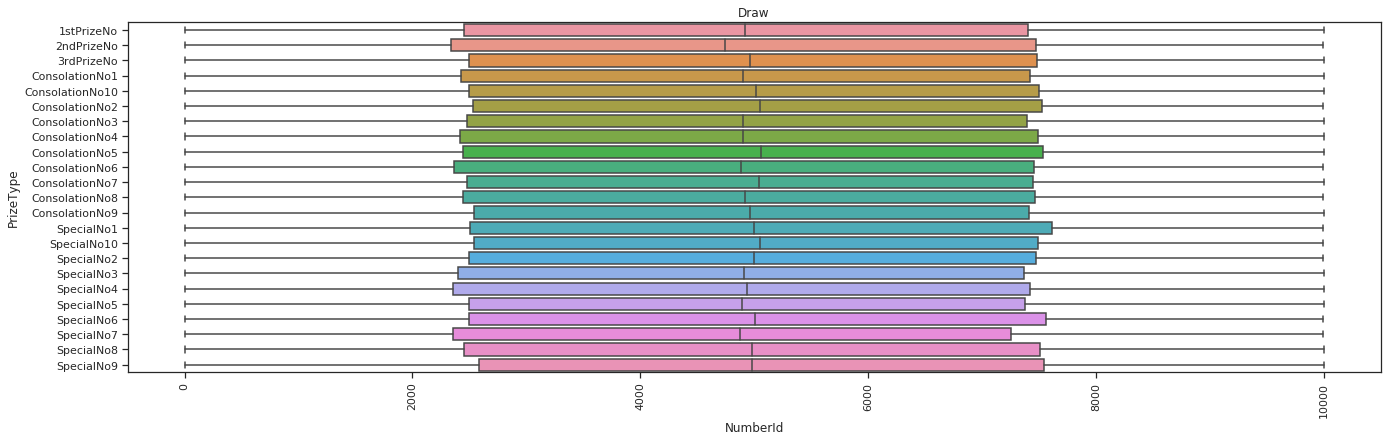

In [14]:
plt.figure(figsize=(20,6))
sns.boxplot(x='NumberId', y='PrizeType',data=data)
plt.xticks(rotation=90)
plt.title('Draw')

print(data[data['NumberId']==1760])

## Exploration

In [0]:
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

## Making Labels

In [16]:
data['TotalStrike'] = 1
data.head(10)

,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
0,40792,1992-05-06,1stPrizeNo,19,19,1
1,40792,1992-05-06,2ndPrizeNo,1124,1124,1
2,40792,1992-05-06,3rdPrizeNo,592,592,1
3,40792,1992-05-06,ConsolationNo1,5311,5311,1
4,40792,1992-05-06,ConsolationNo10,407,407,1
5,40792,1992-05-06,ConsolationNo2,1949,1949,1
6,40792,1992-05-06,ConsolationNo3,1606,1606,1
7,40792,1992-05-06,ConsolationNo4,3775,3775,1
8,40792,1992-05-06,ConsolationNo5,6226,6226,1
9,40792,1992-05-06,ConsolationNo6,1271,1271,1


In [0]:
def make_cutoffs(start_date, end_date, threshold=0):
    # Find numbers exist before start date
    number_pool = data[data['DrawDate'] < start_date]['NumberId'].unique()
    tmp = pd.DataFrame({'NumberId': number_pool})
   
    # For numbers in the number pool, find their strike count between the start and end dates
    strike_counts = data[(data['NumberId'].isin(number_pool)) & 
        (data['DrawDate'] >= start_date) & 
        (data['DrawDate']< end_date)
    ].groupby('NumberId')['TotalStrike'].count().reset_index()
    
    number_of_draws = data[
                 (data['DrawDate'] >= start_date) & 
                 (data['DrawDate']< end_date)]['DrawDate'].nunique()
    # display(strike_counts)
    # print(number_of_draws)
    
    # Merge with all the number ids to record all customers who existed before start date
    strike_counts = strike_counts.merge(tmp, on='NumberId', how='right')
    
    # Set the total for any numbers who did not strike in the timeframe equal to 0
    strike_counts['TotalStrike'] = strike_counts['TotalStrike'].fillna(0)
    
    # Label is based on the threshold
    strike_counts['Label'] = (strike_counts['TotalStrike'] > threshold).astype(int)
        
    # The cutoff time is the start date
    strike_counts['cutoff_time'] = pd.to_datetime(start_date)
    strike_counts = strike_counts[['NumberId', 'cutoff_time', 'TotalStrike', 'Label']]
    
    #display(strike_counts[strike_counts['Label']==1].nunique())
    #display(strike_counts.sort_values(by='TotalStrike', ascending=False))
   
    return number_of_draws, strike_counts

In [18]:
number_of_draws, may_2015 = make_cutoffs(pd.datetime(2015, 5, 1), pd.datetime(2015, 6, 1))
#display(len(may_2015))
#display(may_2015[may_2015['Label']==1].nunique())
may_2015[(may_2015['Label']==1) & (may_2015['TotalStrike']==2)].sort_values(by='TotalStrike', ascending=False).head()

,NumberId,cutoff_time,TotalStrike,Label
37,904,2015-05-01,2.0,1
66,1760,2015-05-01,2.0,1
114,3012,2015-05-01,2.0,1
333,9160,2015-05-01,2.0,1
340,9417,2015-05-01,2.0,1


Text(0.5, 1.0, 'Label Distribution for May')

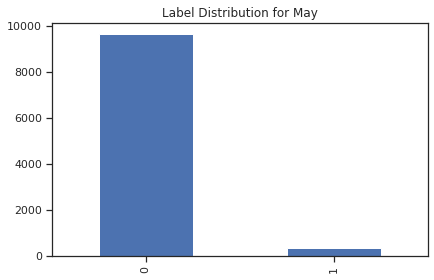

In [19]:
may_2015['Label'].value_counts().plot.bar()
plt.title('Label Distribution for May')

In [0]:
CUT_OFF_YEAR=pd.datetime(2014, 1, 1)

In [21]:
## Loop through each month starting from CUT_OFF_YEAR

from dateutil.relativedelta import relativedelta

# print(data['DrawDate'].max())
max_year_month = data['DrawDate'].max() - relativedelta(months=1) + relativedelta(day=31)
print(f"Max month year: {max_year_month}")

start_year_month = CUT_OFF_YEAR

months_data = []
total_draws = 0
while start_year_month < max_year_month:
    start_date = start_year_month 
    end_date = start_date + relativedelta(months=1)
    start_year_month = start_year_month + relativedelta(months=1)
    #print(f"Labels from {start_date} to {end_date}")
    draw_count, month_data = make_cutoffs(start_date, end_date)
    total_draws = total_draws + draw_count
    months_data.append(month_data)

print(f"Total draws: {total_draws}")
print(f"Total draws: {data[(data['DrawDate'] >= CUT_OFF_YEAR) & (data['DrawDate'] <= max_year_month)]['DrawDate'].nunique()}")
print(f"Total months:{len(months_data)}")
print(f"Total records count: {sum([len(l) for l in months_data])}")
print([len(l) for l in months_data])

Max month year: 2019-10-31 00:00:00
Total draws: 1032
Total draws: 1032
Total months:70
Total records count: 699972
[9998, 9998, 9998, 9998, 9998, 9998, 9998, 9998, 9998, 9998, 9998, 9999, 9999, 9999, 9999, 9999, 9999, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000]


In [22]:
labels = pd.concat(months_data)
labels.to_csv(DATASET_PATH/'labels.csv')
labels.describe()

,NumberId,TotalStrike,Label
count,699972.000000,699972.000000,699972.000000
mean,4999.414912,0.033907,0.033343
std,2886.751031,0.184113,0.179530
min,0.000000,0.000000,0.000000
25%,2499.000000,0.000000,0.000000
50%,4999.000000,0.000000,0.000000
75%,7499.000000,0.000000,0.000000
max,9999.000000,3.000000,1.000000


In [0]:
# plot_labels = labels.copy()
# plot_labels['month'] = plot_labels['cutoff_time'].dt.month

# plt.figure(figsize = (12, 6))
# sns.boxplot(x = 'month', y = 'TotalStrike', 
#             data = plot_labels[(plot_labels['TotalStrike'] > 0)]);
# plt.title('Distribution by Month');

In [24]:
labels[(labels['NumberId'] == 9016)  & (labels['Label'] > 0)]

,NumberId,cutoff_time,TotalStrike,Label
307,9016,2014-10-01,1.0,1
305,9016,2016-05-01,1.0,1


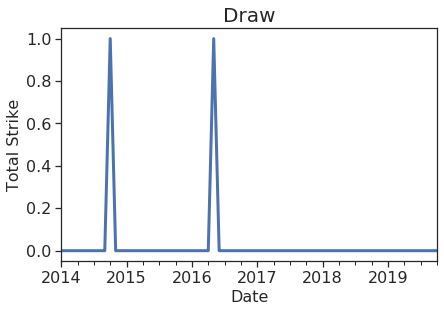

In [25]:
labels.loc[labels['NumberId'] == 9016].set_index('cutoff_time')['TotalStrike'].plot(figsize = (6, 4), linewidth = 3)
plt.xlabel('Date', size = 16); 
plt.ylabel('Total Strike', size = 16); 
plt.title('Draw', size = 20);
plt.xticks(size = 16); plt.yticks(size = 16);

## Automated Feature Engineering

In [26]:
es = ft.EntitySet(id="Lotto Results")

# Add the entire data table as an entity
es.entity_from_dataframe("Results",
                         dataframe=data,
                         index="results_index",
                         time_index = 'DrawDate')

es['Results']

2019-12-30 03:02:04,498 featuretools.entityset - WARNING    index results_index not found in dataframe, creating new integer column


Entity: Results
  Variables:
    results_index (dtype: index)
    DrawNo (dtype: numeric)
    DrawDate (dtype: datetime_time_index)
    PrizeType (dtype: categorical)
    LuckyNo (dtype: numeric)
    NumberId (dtype: numeric)
    TotalStrike (dtype: numeric)
  Shape:
    (Rows: 106398, Columns: 7)

In [27]:
es.normalize_entity(new_entity_id="Numbers",
                    base_entity_id="Results",
                    index="NumberId",
                    )

Entityset: Lotto Results
  Entities:
    Results [Rows: 106398, Columns: 7]
    Numbers [Rows: 10000, Columns: 2]
  Relationships:
    Results.NumberId -> Numbers.NumberId

In [28]:
es

Entityset: Lotto Results
  Entities:
    Results [Rows: 106398, Columns: 7]
    Numbers [Rows: 10000, Columns: 2]
  Relationships:
    Results.NumberId -> Numbers.NumberId

In [29]:
es['Numbers'].df.head(24)

,NumberId,first_Results_time
19,19,1992-05-06
407,407,1992-05-06
592,592,1992-05-06
950,950,1992-05-06
1124,1124,1992-05-06
1271,1271,1992-05-06
1606,1606,1992-05-06
1949,1949,1992-05-06
2479,2479,1992-05-06
3114,3114,1992-05-06


In [30]:
es['Results'].df.head(24)

,results_index,DrawNo,DrawDate,PrizeType,LuckyNo,NumberId,TotalStrike
0,0,40792,1992-05-06,1stPrizeNo,19,19,1
1,1,40792,1992-05-06,2ndPrizeNo,1124,1124,1
2,2,40792,1992-05-06,3rdPrizeNo,592,592,1
3,3,40792,1992-05-06,ConsolationNo1,5311,5311,1
4,4,40792,1992-05-06,ConsolationNo10,407,407,1
5,5,40792,1992-05-06,ConsolationNo2,1949,1949,1
6,6,40792,1992-05-06,ConsolationNo3,1606,1606,1
7,7,40792,1992-05-06,ConsolationNo4,3775,3775,1
8,8,40792,1992-05-06,ConsolationNo5,6226,6226,1
9,9,40792,1992-05-06,ConsolationNo6,1271,1271,1


In [31]:
len(es['Results'].df)

106398

## Deep Feature Synthesis

In [0]:
# feature_matrix, feature_names = ft.dfs(entityset=es, target_entity='Numbers',
#                                        cutoff_time = labels, verbose = 2,
#                                        cutoff_time_in_index = True,
#                                        chunk_size = len(labels), n_jobs = 1,
#                                        max_depth = 1)

In [33]:
feature_matrix, feature_names = ft.dfs(entityset=es, target_entity='Numbers',
                                       agg_primitives = ['std', 'max', 'min', 'mode',
                                                         'mean', 'skew', 'last', 'avg_time_between'],
                                       trans_primitives = ['cum_sum', 'cum_mean', 'day', 
                                                           'month', 'hour', 'weekend'],
                                        cutoff_time = labels, verbose = 1,
                                        cutoff_time_in_index = True,
                                        chunk_size = len(labels), n_jobs = 1,
                                        max_depth = 2)

Built 72 features
Elapsed: 1:41:11 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 1/1 chunks


In [44]:
len(feature_matrix.columns), feature_matrix.columns

(120, Index(['NumberId', 'time', 'STD(Results.DrawNo)', 'STD(Results.LuckyNo)',
        'STD(Results.TotalStrike)', 'MAX(Results.DrawNo)',
        'MAX(Results.LuckyNo)', 'MAX(Results.TotalStrike)',
        'MIN(Results.DrawNo)', 'MIN(Results.LuckyNo)',
        ...
        'LAST(Results.PrizeType)_SpecialNo1',
        'LAST(Results.PrizeType)_SpecialNo10',
        'LAST(Results.PrizeType)_SpecialNo2',
        'LAST(Results.PrizeType)_SpecialNo3',
        'LAST(Results.PrizeType)_SpecialNo4',
        'LAST(Results.PrizeType)_SpecialNo5',
        'LAST(Results.PrizeType)_SpecialNo6',
        'LAST(Results.PrizeType)_SpecialNo7',
        'LAST(Results.PrizeType)_SpecialNo8',
        'LAST(Results.PrizeType)_SpecialNo9'],
       dtype='object', length=120))

In [45]:
len(feature_matrix)

699972

In [46]:
feature_matrix.head().T

,0,1,2,3,4
NumberId,0,1,2,3,4
time,2014-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00,2014-01-01 00:00:00
STD(Results.DrawNo),116257,96697.5,49525.7,116135,78119.5
STD(Results.LuckyNo),0,0,0,0,0
STD(Results.TotalStrike),0,0,0,0,0
...,...,...,...,...,...
LAST(Results.PrizeType)_SpecialNo5,0,0,0,0,0
LAST(Results.PrizeType)_SpecialNo6,0,0,0,0,1
LAST(Results.PrizeType)_SpecialNo7,0,0,0,0,0
LAST(Results.PrizeType)_SpecialNo8,0,0,0,0,0


In [47]:
feature_matrix.shape

(699972, 120)

In [71]:
feature_matrix[(feature_matrix['NumberId']==0) & (feature_matrix['Label']==1)].head(10)

,index,NumberId,time,STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),LAST(Results.DrawNo),LAST(Results.LuckyNo),LAST(Results.TotalStrike),AVG_TIME_BETWEEN(Results.DrawDate),DAY(first_Results_time),MONTH(first_Results_time),HOUR(first_Results_time),WEEKEND(first_Results_time),STD(Results.CUM_SUM(TotalStrike by NumberId)),STD(Results.CUM_SUM(LuckyNo by NumberId)),STD(Results.CUM_SUM(DrawNo by NumberId)),STD(Results.CUM_MEAN(TotalStrike by NumberId)),STD(Results.CUM_MEAN(LuckyNo by NumberId)),STD(Results.CUM_MEAN(DrawNo by NumberId)),MAX(Results.CUM_SUM(TotalStrike by NumberId)),MAX(Results.CUM_SUM(LuckyNo by NumberId)),MAX(Results.CUM_SUM(DrawNo by NumberId)),MAX(Results.CUM_MEAN(TotalStrike by NumberId)),MAX(Results.CUM_MEAN(LuckyNo by NumberId)),MAX(Results.CUM_MEAN(DrawNo by NumberId)),MIN(Results.CUM_SUM(TotalStrike by NumberId)),MIN(Results.CUM_SUM(LuckyNo by NumberId)),...,MODE(Results.PrizeType)_ConsolationNo5,MODE(Results.PrizeType)_ConsolationNo6,MODE(Results.PrizeType)_ConsolationNo7,MODE(Results.PrizeType)_ConsolationNo8,MODE(Results.PrizeType)_ConsolationNo9,MODE(Results.PrizeType)_SpecialNo1,MODE(Results.PrizeType)_SpecialNo10,MODE(Results.PrizeType)_SpecialNo2,MODE(Results.PrizeType)_SpecialNo3,MODE(Results.PrizeType)_SpecialNo4,MODE(Results.PrizeType)_SpecialNo5,MODE(Results.PrizeType)_SpecialNo6,MODE(Results.PrizeType)_SpecialNo7,MODE(Results.PrizeType)_SpecialNo8,MODE(Results.PrizeType)_SpecialNo9,LAST(Results.PrizeType)_1stPrizeNo,LAST(Results.PrizeType)_2ndPrizeNo,LAST(Results.PrizeType)_3rdPrizeNo,LAST(Results.PrizeType)_ConsolationNo1,LAST(Results.PrizeType)_ConsolationNo10,LAST(Results.PrizeType)_ConsolationNo2,LAST(Results.PrizeType)_ConsolationNo3,LAST(Results.PrizeType)_ConsolationNo4,LAST(Results.PrizeType)_ConsolationNo5,LAST(Results.PrizeType)_ConsolationNo6,LAST(Results.PrizeType)_ConsolationNo7,LAST(Results.PrizeType)_ConsolationNo8,LAST(Results.PrizeType)_ConsolationNo9,LAST(Results.PrizeType)_SpecialNo1,LAST(Results.PrizeType)_SpecialNo10,LAST(Results.PrizeType)_SpecialNo2,LAST(Results.PrizeType)_SpecialNo3,LAST(Results.PrizeType)_SpecialNo4,LAST(Results.PrizeType)_SpecialNo5,LAST(Results.PrizeType)_SpecialNo6,LAST(Results.PrizeType)_SpecialNo7,LAST(Results.PrizeType)_SpecialNo8,LAST(Results.PrizeType)_SpecialNo9,month,year
9998,9998,0,2014-02-01,116257.358547,0.0,0.0,394013,0,1,91595,0,1,232241.125000,0,1,0.419098,0.0,0.0,394013,0,1,8.168503e+07,2,8,0,False,2.449490,0.0,6.236459e+05,0.0,0.0,48912.177594,8,0,1857929,1.0,0.0,232241.125000,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2014
89982,89982,0,2014-10-01,122469.292360,0.0,0.0,401214,0,1,91595,0,1,251015.888889,0,1,0.128079,0.0,0.0,401214,0,1,7.306200e+07,2,8,0,False,2.738613,0.0,7.591470e+05,0.0,0.0,55811.659340,9,0,2259143,1.0,0.0,251015.888889,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,10,2014
99980,99980,0,2014-11-01,127749.388766,0.0,0.0,413614,0,1,91595,0,1,280561.000000,0,1,-0.275724,0.0,0.0,413614,0,1,6.066144e+07,2,8,0,False,3.316625,0.0,1.034453e+06,0.0,0.0,66437.125671,11,0,3086171,1.0,0.0,280561.000000,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,2014


## Correlations

In [51]:
feature_matrix = pd.get_dummies(feature_matrix).reset_index()
feature_matrix.shape

(699972, 121)

In [52]:
feature_matrix.head()

,index,NumberId,time,STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),LAST(Results.DrawNo),LAST(Results.LuckyNo),LAST(Results.TotalStrike),AVG_TIME_BETWEEN(Results.DrawDate),DAY(first_Results_time),MONTH(first_Results_time),HOUR(first_Results_time),WEEKEND(first_Results_time),STD(Results.CUM_SUM(TotalStrike by NumberId)),STD(Results.CUM_SUM(LuckyNo by NumberId)),STD(Results.CUM_SUM(DrawNo by NumberId)),STD(Results.CUM_MEAN(TotalStrike by NumberId)),STD(Results.CUM_MEAN(LuckyNo by NumberId)),STD(Results.CUM_MEAN(DrawNo by NumberId)),MAX(Results.CUM_SUM(TotalStrike by NumberId)),MAX(Results.CUM_SUM(LuckyNo by NumberId)),MAX(Results.CUM_SUM(DrawNo by NumberId)),MAX(Results.CUM_MEAN(TotalStrike by NumberId)),MAX(Results.CUM_MEAN(LuckyNo by NumberId)),MAX(Results.CUM_MEAN(DrawNo by NumberId)),MIN(Results.CUM_SUM(TotalStrike by NumberId)),MIN(Results.CUM_SUM(LuckyNo by NumberId)),...,MODE(Results.PrizeType)_ConsolationNo3,MODE(Results.PrizeType)_ConsolationNo4,MODE(Results.PrizeType)_ConsolationNo5,MODE(Results.PrizeType)_ConsolationNo6,MODE(Results.PrizeType)_ConsolationNo7,MODE(Results.PrizeType)_ConsolationNo8,MODE(Results.PrizeType)_ConsolationNo9,MODE(Results.PrizeType)_SpecialNo1,MODE(Results.PrizeType)_SpecialNo10,MODE(Results.PrizeType)_SpecialNo2,MODE(Results.PrizeType)_SpecialNo3,MODE(Results.PrizeType)_SpecialNo4,MODE(Results.PrizeType)_SpecialNo5,MODE(Results.PrizeType)_SpecialNo6,MODE(Results.PrizeType)_SpecialNo7,MODE(Results.PrizeType)_SpecialNo8,MODE(Results.PrizeType)_SpecialNo9,LAST(Results.PrizeType)_1stPrizeNo,LAST(Results.PrizeType)_2ndPrizeNo,LAST(Results.PrizeType)_3rdPrizeNo,LAST(Results.PrizeType)_ConsolationNo1,LAST(Results.PrizeType)_ConsolationNo10,LAST(Results.PrizeType)_ConsolationNo2,LAST(Results.PrizeType)_ConsolationNo3,LAST(Results.PrizeType)_ConsolationNo4,LAST(Results.PrizeType)_ConsolationNo5,LAST(Results.PrizeType)_ConsolationNo6,LAST(Results.PrizeType)_ConsolationNo7,LAST(Results.PrizeType)_ConsolationNo8,LAST(Results.PrizeType)_ConsolationNo9,LAST(Results.PrizeType)_SpecialNo1,LAST(Results.PrizeType)_SpecialNo10,LAST(Results.PrizeType)_SpecialNo2,LAST(Results.PrizeType)_SpecialNo3,LAST(Results.PrizeType)_SpecialNo4,LAST(Results.PrizeType)_SpecialNo5,LAST(Results.PrizeType)_SpecialNo6,LAST(Results.PrizeType)_SpecialNo7,LAST(Results.PrizeType)_SpecialNo8,LAST(Results.PrizeType)_SpecialNo9
0,0,0,2014-01-01,116257.358547,0.0,0.0,394013,0,1,91595,0,1,232241.125000,0,1,0.419098,0.0,0.0,394013,0,1,8.168503e+07,2,8,0,False,2.449490,0.000000,623645.904344,0.0,0.0,48912.177594,8,0,1857929,1.0,0.0,232241.125000,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,2014-01-01,96697.500291,0.0,0.0,363311,1,1,56893,1,1,174578.000000,1,1,0.722334,0.0,0.0,363311,1,1,7.342920e+07,16,5,0,True,2.738613,2.738613,518688.748692,0.0,0.0,39905.319561,9,9,1571202,1.0,1.0,174578.000000,1,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,2,2014-01-01,49525.697299,0.0,0.0,265606,2,1,157599,2,1,224728.250000,2,1,-1.079713,0.0,0.0,265606,2,1,6.865920e+07,29,9,0,False,1.290994,2.581989,320788.010017,0.0,0.0,29427.352880,4,8,898913,1.0,2.0,224728.250000,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,3,2014-01-01,116134.910768,0.0,0.0,393913,3,1,84395,3,1,203564.500000,3,1,0.757804,0.0,0.0,393913,3,1,8.372160e+07,15,2,0,False,2.449490,7.348469,540284.858681,0.0,0.0,41996.424740,8,24,1628516,1.0,3.0,203564.500000,1,3,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,4,4,2014-01-01,78119.505233,0.0,0.0,335810,4,1,100696,4,1,193401.444444,4,1,0.882965,0.0,0.0,335810,4,1,5.621400e+07,2,3,0,

In [53]:
corrs = feature_matrix.corr().sort_values('TotalStrike')
corrs['TotalStrike'].head()

LAST(Results.DAY(DrawDate))              -0.012135
DAY(LAST(Results.DrawDate))              -0.012135
MODE(Results.PrizeType)_SpecialNo8       -0.003139
MODE(Results.PrizeType)_ConsolationNo9   -0.002791
index                                    -0.002659
Name: TotalStrike, dtype: float64

In [56]:
corrs['TotalStrike'].dropna().tail(10)

LAST(Results.DrawNo)                          0.003362
MEAN(Results.DrawNo)                          0.003483
LAST(Results.CUM_MEAN(DrawNo by NumberId))    0.003483
MAX(Results.CUM_MEAN(DrawNo by NumberId))     0.003483
LAST(Results.CUM_SUM(DrawNo by NumberId))     0.003516
MAX(Results.CUM_SUM(DrawNo by NumberId))      0.003516
MEAN(Results.CUM_SUM(DrawNo by NumberId))     0.003569
STD(Results.CUM_SUM(DrawNo by NumberId))      0.003656
Label                                         0.991613
TotalStrike                                   1.000000
Name: TotalStrike, dtype: float64

In [57]:
g = sns.FacetGrid(feature_matrix[(feature_matrix['SUM(Results.DrawNo)'] > 0)],
                  hue = 'Label', size = 4, aspect = 3)
g.map(sns.kdeplot, 'SUM(Results.DrawNo)')
g.add_legend();
plt.title('Distribution of Results Total by Label');

KeyError: ignored

In [0]:
feature_matrix['month'] = feature_matrix['time'].dt.month
feature_matrix['year'] = feature_matrix['time'].dt.year

In [59]:
feature_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699972 entries, 0 to 699971
Columns: 123 entries, index to year
dtypes: bool(3), datetime64[ns](1), float64(36), int64(37), uint8(46)
memory usage: 427.9 MB


In [60]:
feature_matrix.head()

,index,NumberId,time,STD(Results.DrawNo),STD(Results.LuckyNo),STD(Results.TotalStrike),MAX(Results.DrawNo),MAX(Results.LuckyNo),MAX(Results.TotalStrike),MIN(Results.DrawNo),MIN(Results.LuckyNo),MIN(Results.TotalStrike),MEAN(Results.DrawNo),MEAN(Results.LuckyNo),MEAN(Results.TotalStrike),SKEW(Results.DrawNo),SKEW(Results.LuckyNo),SKEW(Results.TotalStrike),LAST(Results.DrawNo),LAST(Results.LuckyNo),LAST(Results.TotalStrike),AVG_TIME_BETWEEN(Results.DrawDate),DAY(first_Results_time),MONTH(first_Results_time),HOUR(first_Results_time),WEEKEND(first_Results_time),STD(Results.CUM_SUM(TotalStrike by NumberId)),STD(Results.CUM_SUM(LuckyNo by NumberId)),STD(Results.CUM_SUM(DrawNo by NumberId)),STD(Results.CUM_MEAN(TotalStrike by NumberId)),STD(Results.CUM_MEAN(LuckyNo by NumberId)),STD(Results.CUM_MEAN(DrawNo by NumberId)),MAX(Results.CUM_SUM(TotalStrike by NumberId)),MAX(Results.CUM_SUM(LuckyNo by NumberId)),MAX(Results.CUM_SUM(DrawNo by NumberId)),MAX(Results.CUM_MEAN(TotalStrike by NumberId)),MAX(Results.CUM_MEAN(LuckyNo by NumberId)),MAX(Results.CUM_MEAN(DrawNo by NumberId)),MIN(Results.CUM_SUM(TotalStrike by NumberId)),MIN(Results.CUM_SUM(LuckyNo by NumberId)),...,MODE(Results.PrizeType)_ConsolationNo5,MODE(Results.PrizeType)_ConsolationNo6,MODE(Results.PrizeType)_ConsolationNo7,MODE(Results.PrizeType)_ConsolationNo8,MODE(Results.PrizeType)_ConsolationNo9,MODE(Results.PrizeType)_SpecialNo1,MODE(Results.PrizeType)_SpecialNo10,MODE(Results.PrizeType)_SpecialNo2,MODE(Results.PrizeType)_SpecialNo3,MODE(Results.PrizeType)_SpecialNo4,MODE(Results.PrizeType)_SpecialNo5,MODE(Results.PrizeType)_SpecialNo6,MODE(Results.PrizeType)_SpecialNo7,MODE(Results.PrizeType)_SpecialNo8,MODE(Results.PrizeType)_SpecialNo9,LAST(Results.PrizeType)_1stPrizeNo,LAST(Results.PrizeType)_2ndPrizeNo,LAST(Results.PrizeType)_3rdPrizeNo,LAST(Results.PrizeType)_ConsolationNo1,LAST(Results.PrizeType)_ConsolationNo10,LAST(Results.PrizeType)_ConsolationNo2,LAST(Results.PrizeType)_ConsolationNo3,LAST(Results.PrizeType)_ConsolationNo4,LAST(Results.PrizeType)_ConsolationNo5,LAST(Results.PrizeType)_ConsolationNo6,LAST(Results.PrizeType)_ConsolationNo7,LAST(Results.PrizeType)_ConsolationNo8,LAST(Results.PrizeType)_ConsolationNo9,LAST(Results.PrizeType)_SpecialNo1,LAST(Results.PrizeType)_SpecialNo10,LAST(Results.PrizeType)_SpecialNo2,LAST(Results.PrizeType)_SpecialNo3,LAST(Results.PrizeType)_SpecialNo4,LAST(Results.PrizeType)_SpecialNo5,LAST(Results.PrizeType)_SpecialNo6,LAST(Results.PrizeType)_SpecialNo7,LAST(Results.PrizeType)_SpecialNo8,LAST(Results.PrizeType)_SpecialNo9,month,year
0,0,0,2014-01-01,116257.358547,0.0,0.0,394013,0,1,91595,0,1,232241.125000,0,1,0.419098,0.0,0.0,394013,0,1,8.168503e+07,2,8,0,False,2.449490,0.000000,623645.904344,0.0,0.0,48912.177594,8,0,1857929,1.0,0.0,232241.125000,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2014
1,1,1,2014-01-01,96697.500291,0.0,0.0,363311,1,1,56893,1,1,174578.000000,1,1,0.722334,0.0,0.0,363311,1,1,7.342920e+07,16,5,0,True,2.738613,2.738613,518688.748692,0.0,0.0,39905.319561,9,9,1571202,1.0,1.0,174578.000000,1,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2014
2,2,2,2014-01-01,49525.697299,0.0,0.0,265606,2,1,157599,2,1,224728.250000,2,1,-1.079713,0.0,0.0,265606,2,1,6.865920e+07,29,9,0,False,1.290994,2.581989,320788.010017,0.0,0.0,29427.352880,4,8,898913,1.0,2.0,224728.250000,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2014
3,3,3,2014-01-01,116134.910768,0.0,0.0,393913,3,1,84395,3,1,203564.500000,3,1,0.757804,0.0,0.0,393913,3,1,8.372160e+07,15,2,0,False,2.449490,7.348469,540284.858681,0.0,0.0,41996.424740,8,24,1628516,1.0,3.0,203564.500000,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2014
4,4,4,2014-01-01,78119.505233,0.0,0.0,335810,4,1,100696,4,1,193401.444444,4,1,0.882965,0.0,0.0,335810,4,1,5.621400e+07,2,3,0,True,2.738613,10.954451,552302.932173,0.0,0.0,30071.897

## Save feature matrix

In [0]:
#if COLAB:
#  feature_matrix.to_csv(DATASET_PATH/'feature_matrix.csv', index=False)
#  feature_matrix.to_pickle(DATASET_PATH/'feature_matrix.pkl')

### Save the data

https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [62]:
if COLAB:
  #!cd dl-projects && git config --global user.email 'mengwangk@gmail.com' 
  #!cd dl-projects && git config --global user.name 'mengwangk'
  #!cd dl-projects && git add -A && git commit -m 'Updated from colab' 
  from google.colab import drive
  drive.mount('/content/gdrive')
  GDRIVE_DATASET_FOLDER = Path('gdrive/My Drive/datasets/')
  #!ls /content/gdrive/My\ Drive/
  feature_matrix.to_csv(GDRIVE_DATASET_FOLDER/'feature_matrix_2.csv', index=False)
  feature_matrix.to_pickle(GDRIVE_DATASET_FOLDER/'feature_matrix_2.pkl')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#if COLAB:
#  !cd dl-projects && git remote rm origin && git remote add origin https://mengwangk:XX@github.com/mengwangk/dl-projects.git && git push -u origin master

In [0]:
# from google.colab import files
# files.download(DATASET_PATH/'feature_matrix.csv') 

In [67]:
if COLAB:
  !cd gdrive/"My Drive"/datasets/ && ls -l --block-size=M

total 1151M
-rw------- 1 root root 407M Dec 30 05:01 feature_matrix_2.csv
-rw------- 1 root root 428M Dec 30 05:01 feature_matrix_2.pkl
-rw------- 1 root root 141M Dec 27 08:27 feature_matrix.csv
-rw------- 1 root root 176M Dec 27 08:28 feature_matrix.pkl
